# Quickstart

This notebook shows a quickstart of `daskperiment`.

`daskperiment` is a lightweight tool to perform reproducible machine learning experiment using `Dask`. It can be used in both `Jupyter` and command line (and also in standard `Python` interpreter). See [commandline.ipynb](https://github.com/sinhrks/daskperiment/blob/master/notebook/commandline.ipynb) example to see command line usage.

In [1]:
%matplotlib inline
import numpy as np
import daskperiment

First, create `daskperiment.Experiment` instance. This instance controlls an experiment, a chain of functions to output value and a collection of input variables.

In [2]:
ex = daskperiment.Experiment(id='quickstart_pj')

2019-01-25 23:21:43,113 [daskperiment.io.serialize] [INFO] Creating new cache directory: /Users/sinhrks/Git/daskperiment/notebook/daskperiment_cache/quickstart_pj_0
2019-01-25 23:21:43,126 [daskperiment.core.experiment] [INFO] Initialized new experiment: daskperiment_cache/quickstart_pj_0/quickstart_pj_0.pkl
2019-01-25 23:21:43,128 [daskperiment.core.environment] [INFO] Platform: Darwin-17.7.0-x86_64-i386-64bit
2019-01-25 23:21:43,130 [daskperiment.core.environment] [INFO] Python: CPython 3.6.6 (Jupyter Notebook)
2019-01-25 23:21:43,133 [daskperiment.core.environment] [INFO] daskperiment version: 0.1.0.dev0
2019-01-25 23:21:43,135 [daskperiment.core.environment] [INFO] daskperiment path: /Users/sinhrks/Git/daskperiment/daskperiment
2019-01-25 23:21:43,137 [daskperiment.core.environment] [INFO] Working directory: /Users/sinhrks/Git/daskperiment/notebook


Then, use `Experiment.parameter` method to define parameters (input variables for the experiment). The actual value of each parameter can be changed in every trial.

In [3]:
a = ex.parameter('a')
b = ex.parameter('b')
a

Parameter(a: Undefined)

Next, you can define each experiment step (function) by decorating with `Experiment` instance (`@ex`).

Note that the function to output the final result (mostly objective value to be minimized or maximized) must be decorated with `Experiment.result`. The chain of these functions are expressed as `Dask.Delayed` instance.

In [4]:
@ex
def prepare_data(a, b):
    return a + b

@ex.result
def calculate_score(s):
    return s + 1

d = prepare_data(a, b)
s = calculate_score(d)
s

Delayed('calculate_score-d8119310-7121-453e-9c20-5026af7ee479')

Thus, you can visualize computation graph via `.visualize` method.

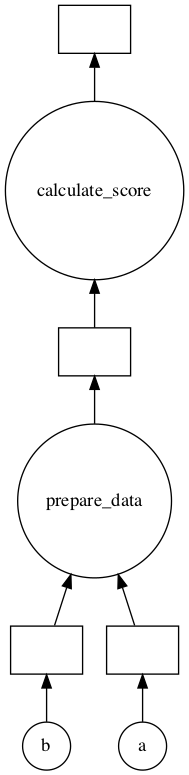

In [5]:
s.visualize()

Use `Experiment.set_parameters` method to set parameters for a trial. After setting parameters, `Parameter` variable and experiment result will be computable.

Parameters are recommended to be a scalar (or lightweight value) because these are stored as history (for example, passing filename as a parameter is　preffered rather than passing `DataFrame`).

In [6]:
ex.set_parameters(a=1, b=2)
a.compute()

2019-01-25 23:21:44,011 [daskperiment.core.parameter] [INFO] Updated parameters: a=1<class 'int'>, b=2<class 'int'>


1

In [7]:
s.compute()

2019-01-25 23:21:44,032 [daskperiment.core.experiment] [INFO] Started Experiment (trial id=1)
2019-01-25 23:21:44,036 [daskperiment.core.experiment] [INFO] Target: calculate_score-d8119310-7121-453e-9c20-5026af7ee479
2019-01-25 23:21:44,039 [daskperiment.core.experiment] [INFO] Parameters: a=1<class 'int'>, b=2<class 'int'>
2019-01-25 23:21:44,044 [daskperiment.core.experiment] [INFO] Finished Experiment (trial id=1)


4

You can update any parameters for next trial. Every trials can be distinguished by trial id.

In [8]:
ex.set_parameters(b=3)
s.compute()

2019-01-25 23:21:44,058 [daskperiment.core.parameter] [INFO] Updated parameters: a=1<class 'int'>, b=3<class 'int'>
2019-01-25 23:21:44,062 [daskperiment.core.experiment] [INFO] Started Experiment (trial id=2)
2019-01-25 23:21:44,066 [daskperiment.core.experiment] [INFO] Target: calculate_score-d8119310-7121-453e-9c20-5026af7ee479
2019-01-25 23:21:44,067 [daskperiment.core.experiment] [INFO] Parameters: a=1<class 'int'>, b=3<class 'int'>
2019-01-25 23:21:44,074 [daskperiment.core.experiment] [INFO] Finished Experiment (trial id=2)


5

After some trials, you can retrieve parameter values specifying trial id.

In [9]:
ex.get_parameters(trial_id=1)

{'a': 1, 'b': 2}

In [10]:
ex.get_parameters(trial_id=2)

{'a': 1, 'b': 3}

`Experiment.get_history` will return a `DataFrame` which stores a history of trial parameters and its results. You can select desirable trial using `pandas` basic operation.

In [11]:
ex.get_history()

,a,b,Result,Finished,Process Time
Trial ID,,,,,
1,1,2,4,2019-01-25 23:21:44.044016,00:00:00.011321
2,1,3,5,2019-01-25 23:21:44.073913,00:00:00.011216


# Handling intermediate result

Next example shows how to retrieve an intermediate result of the chain.

After creating another `Experiment` instance, use `Experiment.persist` decorator at the function to keep its intermediate result. Other usages are all the same. Note that an intermediate result is saved as a pickle file named with its function name, function name must be unique in the experiment.

In [12]:
ex2 = daskperiment.Experiment(id='persist_pj')

a = ex2.parameter('a')
b = ex2.parameter('b')

@ex2.persist
def prepare_data(a, b):
    return a + b

@ex2.result
def calculate_score(s):
    return s + 1

d = prepare_data(a, b)
s = calculate_score(d)

2019-01-25 23:21:44,175 [daskperiment.io.serialize] [INFO] Creating new cache directory: /Users/sinhrks/Git/daskperiment/notebook/daskperiment_cache/persist_pj_0
2019-01-25 23:21:44,177 [daskperiment.core.experiment] [INFO] Initialized new experiment: daskperiment_cache/persist_pj_0/persist_pj_0.pkl
2019-01-25 23:21:44,180 [daskperiment.core.environment] [INFO] Platform: Darwin-17.7.0-x86_64-i386-64bit
2019-01-25 23:21:44,182 [daskperiment.core.environment] [INFO] Python: CPython 3.6.6 (Jupyter Notebook)
2019-01-25 23:21:44,185 [daskperiment.core.environment] [INFO] daskperiment version: 0.1.0.dev0
2019-01-25 23:21:44,187 [daskperiment.core.environment] [INFO] daskperiment path: /Users/sinhrks/Git/daskperiment/daskperiment
2019-01-25 23:21:44,189 [daskperiment.core.environment] [INFO] Working directory: /Users/sinhrks/Git/daskperiment/notebook


Performing some trials.

In [13]:
ex2.set_parameters(a=1, b=2)
s.compute()

2019-01-25 23:21:44,210 [daskperiment.core.parameter] [INFO] Updated parameters: a=1<class 'int'>, b=2<class 'int'>
2019-01-25 23:21:44,216 [daskperiment.core.experiment] [INFO] Started Experiment (trial id=1)
2019-01-25 23:21:44,222 [daskperiment.core.experiment] [INFO] Target: calculate_score-321c2ec2-de60-445a-99b5-b6fa1012d3d8
2019-01-25 23:21:44,225 [daskperiment.core.experiment] [INFO] Parameters: a=1<class 'int'>, b=2<class 'int'>
2019-01-25 23:21:44,232 [daskperiment.io.serialize] [INFO] Saving 3 to path=daskperiment_cache/persist_pj_0/persist_pj_0_prepare_data_1.pkl
2019-01-25 23:21:44,237 [daskperiment.core.experiment] [INFO] Finished Experiment (trial id=1)


4

In [14]:
ex2.set_parameters(a=3, b=2)
s.compute()

2019-01-25 23:21:44,284 [daskperiment.core.parameter] [INFO] Updated parameters: a=3<class 'int'>, b=2<class 'int'>
2019-01-25 23:21:44,288 [daskperiment.core.experiment] [INFO] Started Experiment (trial id=2)
2019-01-25 23:21:44,291 [daskperiment.core.experiment] [INFO] Target: calculate_score-321c2ec2-de60-445a-99b5-b6fa1012d3d8
2019-01-25 23:21:44,294 [daskperiment.core.experiment] [INFO] Parameters: a=3<class 'int'>, b=2<class 'int'>
2019-01-25 23:21:44,302 [daskperiment.io.serialize] [INFO] Saving 5 to path=daskperiment_cache/persist_pj_0/persist_pj_0_prepare_data_2.pkl
2019-01-25 23:21:44,305 [daskperiment.core.experiment] [INFO] Finished Experiment (trial id=2)


6

You can retrieve intermediate results via `Experiment.get_persisted` method by specifying function name and trial id.

In [15]:
ex2.get_persisted('prepare_data', trial_id=1)

2019-01-25 23:21:44,339 [daskperiment.io.serialize] [INFO] Loaded 3 from path=daskperiment_cache/persist_pj_0/persist_pj_0_prepare_data_1.pkl


3

In [16]:
ex2.get_persisted('prepare_data', trial_id=2)

2019-01-25 23:21:44,358 [daskperiment.io.serialize] [INFO] Loaded 5 from path=daskperiment_cache/persist_pj_0/persist_pj_0_prepare_data_2.pkl


5

# Monitoring metrics

You may want to monitor transition of some metrics during each trial. Each experiment function can call `Experiment.save_metric` to save metric with its key (name) and epoch.

In [17]:
ex3 = daskperiment.Experiment(id='metric_pj')

a = ex3.parameter('a')
b = ex3.parameter('b')

@ex3
def prepare_data(a, b):
    return a + b

@ex3.result
def calculate_score(s):
    for i in range(100):
        ex3.save_metric('dummy_score', epoch=i, value=100 - np.random.random() * i)
        
    return s + 1

d = prepare_data(a, b)
s = calculate_score(d)

2019-01-25 23:21:44,401 [daskperiment.io.serialize] [INFO] Creating new cache directory: /Users/sinhrks/Git/daskperiment/notebook/daskperiment_cache/metric_pj_0
2019-01-25 23:21:44,405 [daskperiment.core.experiment] [INFO] Initialized new experiment: daskperiment_cache/metric_pj_0/metric_pj_0.pkl
2019-01-25 23:21:44,406 [daskperiment.core.environment] [INFO] Platform: Darwin-17.7.0-x86_64-i386-64bit
2019-01-25 23:21:44,413 [daskperiment.core.environment] [INFO] Python: CPython 3.6.6 (Jupyter Notebook)
2019-01-25 23:21:44,418 [daskperiment.core.environment] [INFO] daskperiment version: 0.1.0.dev0
2019-01-25 23:21:44,421 [daskperiment.core.environment] [INFO] daskperiment path: /Users/sinhrks/Git/daskperiment/daskperiment
2019-01-25 23:21:44,423 [daskperiment.core.environment] [INFO] Working directory: /Users/sinhrks/Git/daskperiment/notebook


In [18]:
ex3.set_parameters(a=1, b=2)
s.compute()

2019-01-25 23:21:44,438 [daskperiment.core.parameter] [INFO] Updated parameters: a=1<class 'int'>, b=2<class 'int'>
2019-01-25 23:21:44,441 [daskperiment.core.experiment] [INFO] Started Experiment (trial id=1)
2019-01-25 23:21:44,445 [daskperiment.core.experiment] [INFO] Target: calculate_score-6b380060-c5a6-4a8a-bede-647854b05e7d
2019-01-25 23:21:44,447 [daskperiment.core.experiment] [INFO] Parameters: a=1<class 'int'>, b=2<class 'int'>
2019-01-25 23:21:44,453 [daskperiment.core.experiment] [INFO] Finished Experiment (trial id=1)


4

After a trial, you can load saved metric using `Experiment.load_metric` specifying its name and trial_id. As it is returned as `DataFrame`, you can easily investigate it.

In [19]:
dummy_score = ex3.load_metric('dummy_score', trial_id=1)
dummy_score.head()

,1
Epoch,
0,100.000000
1,99.025423
2,99.128525
3,99.784823
4,97.123775


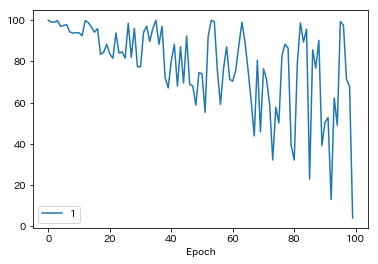

In [20]:
dummy_score.plot()

Perform another trial.

In [21]:
ex3.set_parameters(a=3, b=4)
s.compute()

2019-01-25 23:21:44,880 [daskperiment.core.parameter] [INFO] Updated parameters: a=3<class 'int'>, b=4<class 'int'>
2019-01-25 23:21:44,884 [daskperiment.core.experiment] [INFO] Started Experiment (trial id=2)
2019-01-25 23:21:44,886 [daskperiment.core.experiment] [INFO] Target: calculate_score-6b380060-c5a6-4a8a-bede-647854b05e7d
2019-01-25 23:21:44,887 [daskperiment.core.experiment] [INFO] Parameters: a=3<class 'int'>, b=4<class 'int'>
2019-01-25 23:21:44,891 [daskperiment.core.experiment] [INFO] Finished Experiment (trial id=2)


8

To compare metrics between trials, pass multiple trial ids to `Experiment.load_metric`.

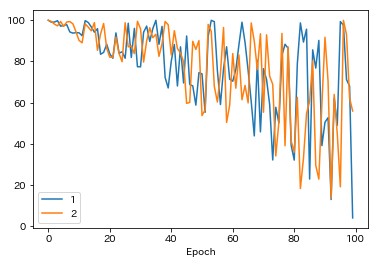

In [22]:
ex3.load_metric('dummy_score', trial_id=[1, 2]).plot()

# Check code context

`daskperiment` also tracks code contexts decorated with `Experiment` decorators. Using `Experiment.get_code` specifying trial id will display the code context used in the trial (shows current code if trial id is not provided).

In [23]:
print(ex3.get_code())

@ex3
def prepare_data(a, b):
    return a + b


@ex3.result
def calculate_score(s):
    for i in range(100):
        ex3.save_metric('dummy_score', epoch=i, value=100 - np.random.random() * i)
        
    return s + 1



In [24]:
print(ex3.get_code(trial_id=1))

@ex3
def prepare_data(a, b):
    return a + b


@ex3.result
def calculate_score(s):
    for i in range(100):
        ex3.save_metric('dummy_score', epoch=i, value=100 - np.random.random() * i)
        
    return s + 1

